In [1]:
# %load_ext rpy2.ipython
# %matplotlib inline


## Python API

Prophet follows the `sklearn` model API.  We create an instance of the `Prophet` class and then call its `fit` and `predict` methods.  

The input to Prophet is always a dataframe with two columns: `ds` and `y`.  The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The `y` column must be numeric, and represents the measurement we wish to forecast.

As an example, let's look at a time series of the log daily page views for the Wikipedia page for [Peyton Manning](https://en.wikipedia.org/wiki/Peyton_Manning).  We scraped this data using the [Wikipediatrend](https://cran.r-project.org/package=wikipediatrend) package in R.  Peyton Manning provides a nice example because it illustrates some of Prophet's features, like multiple seasonality, changing growth rates, and the ability to model special days (such as Manning's playoff and superbowl appearances). The CSV is available [here](https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv).

First we'll import the data:

In [1]:
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
os.chdir('../')
from python import fbprophet
from python.fbprophet import Prophet_Test
import pystan
fbprophet.__version__

'0.7.1_wouter'

In [2]:
os.chdir('C:\\Users\\WoutervanGoudoeverVe\\Documents\\scriptie\\scriptie-wouter\\prophet\\notebooks')
df = pd.read_csv('../examples/example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

We fit the model by instantiating a new `Prophet` object.  Any settings to the forecasting procedure are passed into the constructor.  Then you call its `fit` method and pass in the historical dataframe. Fitting should take 1-5 seconds.

In [3]:
m = Prophet_Test()
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:season
INFO:fbprophet:season
INFO:fbprophet:season
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<class 'python.fbprophet.models.PyStanBackend'>
[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[0. 0. 0. 0. 0.]
{'k': array([[-0.00981908]]), 'm': array([[0.60684051]]), 'delta': array([[ 2.12952267e-01, -5.43943509e-09, -3.11248183e-01,
         1.69598410e-07, -1.34202486e-01]]), 'sigma_obs': array([[0.03968381]]), 'beta': array([[-0.02917519,  0.04872534,  0.01032793, -0.00196263,  0.01240817,
         0.01575864,  0.00957552,  0.0009036 ,  0.00380236, -0.0057137 ,
         0.00746888, -0.00519147,  0.00183355, -0.00469736, -0.00418112,
        -0.00790181, -0.00083653,  0.00128675,  0.0018417 ,  0.00689171,
        -0.0124064 , -0.01053918,  0.00940815,  0.00843837,  0.00088807,
        -0.00352335]]), 'trend': array([[0.60684051, 0.6068372 , 0.60683388, ..., 0.58872409, 0.58864231,
        0.58856053]]), 'Y': array([[0.66985099, 0.65063403, 0.63493061, ..., 0.69631075, 0.6

Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well. 

In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

The `predict` method will assign each row in `future` a predicted value which it names `yhat`.  If you pass in historical dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

[13857. 13858. 13859. ... 17183. 17184. 17185.]
[13857. 13858. 13859. ... 17183. 17184. 17185.]
[13857. 13858. 13859. ... 17183. 17184. 17185.]
[13857. 13858. 13859. ... 17183. 17184. 17185.]


ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.203217    7.483742    8.948140
3266 2017-01-16  8.528203    7.793614    9.265378
3267 2017-01-17  8.315601    7.594067    9.089215
3268 2017-01-18  8.148207    7.415011    8.907938
3269 2017-01-19  8.160103    7.426486    8.962674

You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe.

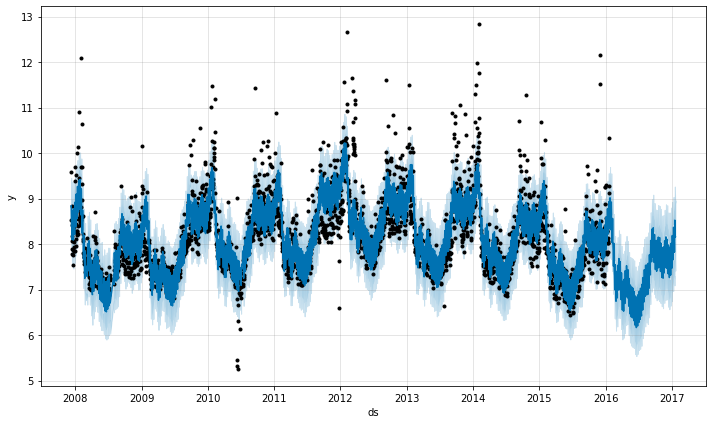

In [6]:
fig1 = m.plot(forecast)

If you want to see the forecast components, you can use the `Prophet.plot_components` method.  By default you'll see the trend, yearly seasonality, and weekly seasonality of the time series.  If you include holidays, you'll see those here, too.

[17167. 17168. 17169. 17170. 17171. 17172. 17173.]
[17167. 17168. 17169. 17170. 17171. 17172. 17173.]
[17167. 17168. 17169. 17170. 17171. 17172. 17173. 17174. 17175. 17176.
 17177. 17178. 17179. 17180. 17181. 17182. 17183. 17184. 17185. 17186.
 17187. 17188. 17189. 17190. 17191. 17192. 17193. 17194. 17195. 17196.
 17197. 17198. 17199. 17200. 17201. 17202. 17203. 17204. 17205. 17206.
 17207. 17208. 17209. 17210. 17211. 17212. 17213. 17214. 17215. 17216.
 17217. 17218. 17219. 17220. 17221. 17222. 17223. 17224. 17225. 17226.
 17227. 17228. 17229. 17230. 17231. 17232. 17233. 17234. 17235. 17236.
 17237. 17238. 17239. 17240. 17241. 17242. 17243. 17244. 17245. 17246.
 17247. 17248. 17249. 17250. 17251. 17252. 17253. 17254. 17255. 17256.
 17257. 17258. 17259. 17260. 17261. 17262. 17263. 17264. 17265. 17266.
 17267. 17268. 17269. 17270. 17271. 17272. 17273. 17274. 17275. 17276.
 17277. 17278. 17279. 17280. 17281. 17282. 17283. 17284. 17285. 17286.
 17287. 17288. 17289. 17290. 17291. 17292. 172

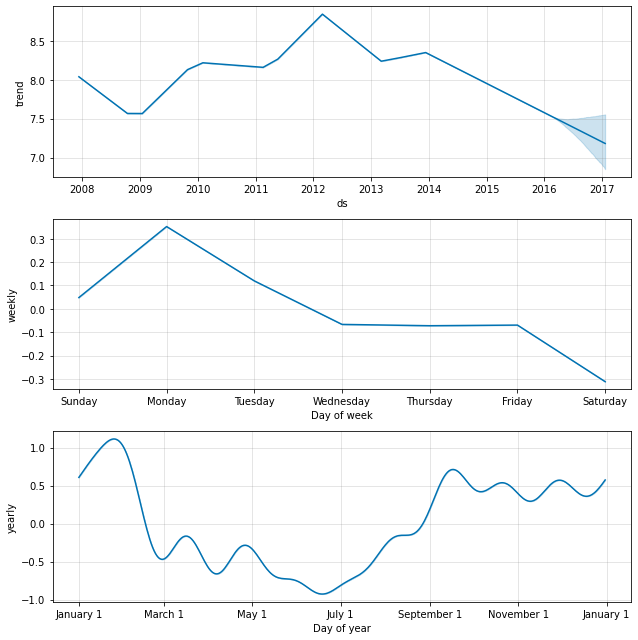

In [7]:
fig2 = m.plot_components(forecast)

An interactive figure of the forecast and components can be created with plotly. You will need to install plotly 4.0 or above separately, as it will not by default be installed with fbprophet. You will also need to install the `notebook` and `ipywidgets` packages.

In [8]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [9]:
plot_components_plotly(m, forecast)

[17167.         17168.00068493 17169.00136986 17170.00205479
 17171.00273973 17172.00342466 17173.00410959 17174.00479452
 17175.00547945 17176.00616438 17177.00684932 17178.00753425
 17179.00821918 17180.00890411 17181.00958904 17182.01027397
 17183.0109589  17184.01164384 17185.01232877 17186.0130137
 17187.01369863 17188.01438356 17189.01506849 17190.01575342
 17191.01643836 17192.01712329 17193.01780822 17194.01849315
 17195.01917808 17196.01986301 17197.02054795 17198.02123288
 17199.02191781 17200.02260274 17201.02328767 17202.0239726
 17203.02465753 17204.02534247 17205.0260274  17206.02671233
 17207.02739726 17208.02808219 17209.02876712 17210.02945205
 17211.03013699 17212.03082192 17213.03150685 17214.03219178
 17215.03287671 17216.03356164 17217.03424658 17218.03493151
 17219.03561644 17220.03630137 17221.0369863  17222.03767123
 17223.03835616 17224.0390411  17225.03972603 17226.04041096
 17227.04109589 17228.04178082 17229.04246575 17230.04315068
 17231.04383562 17232.0445

More details about the options available for each method are available in the docstrings, for example, via `help(Prophet)` or `help(Prophet.fit)`. The [R reference manual](https://cran.r-project.org/web/packages/prophet/prophet.pdf) on CRAN provides a concise list of all of the available functions, each of which has a Python equivalent.

## R API

In R, we use the normal model fitting API.  We provide a `prophet` function that performs fitting and returns a model object.  You can then call `predict` and `plot` on this model object.

In [9]:
%%R
library(prophet)

First we read in the data and create the outcome variable. As in the Python API, this is a dataframe with columns `ds` and `y`, containing the date and numeric value respectively. The ds column should be YYYY-MM-DD for a date, or YYYY-MM-DD HH:MM:SS for a timestamp. As above, we use here the log number of views to Peyton Manning's Wikipedia page, available [here](https://github.com/facebook/prophet/blob/master/examples/example_wp_log_peyton_manning.csv).

In [10]:
%%R
df <- read.csv('../examples/example_wp_log_peyton_manning.csv')

We call the `prophet` function to fit the model.  The first argument is the historical dataframe.  Additional arguments control how Prophet fits the data and are described in later pages of this documentation.

In [11]:
%%R
m <- prophet(df)

Initial log joint probability = -19.4685
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


Predictions are made on a dataframe with a column `ds` containing the dates for which predictions are to be made. The `make_future_dataframe` function takes the model object and a number of periods to forecast and produces a suitable dataframe. By default it will also include the historical dates so we can evaluate in-sample fit.

In [12]:
%%R
future <- make_future_dataframe(m, periods = 365)
tail(future)

             ds
3265 2017-01-14
3266 2017-01-15
3267 2017-01-16
3268 2017-01-17
3269 2017-01-18
3270 2017-01-19


As with most modeling procedures in R, we use the generic `predict` function to get our forecast. The `forecast` object is a dataframe with a column `yhat` containing the forecast. It has additional columns for uncertainty intervals and seasonal components.

In [13]:
%%R
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

             ds     yhat yhat_lower yhat_upper
3265 2017-01-14 7.824163   7.127881   8.609668
3266 2017-01-15 8.205942   7.452071   8.904387
3267 2017-01-16 8.530942   7.742400   9.300974
3268 2017-01-17 8.318327   7.606534   9.071184
3269 2017-01-18 8.150948   7.440224   8.902922
3270 2017-01-19 8.162839   7.385953   8.890669


You can use the generic `plot` function to plot the forecast, by passing in the model and the forecast dataframe.

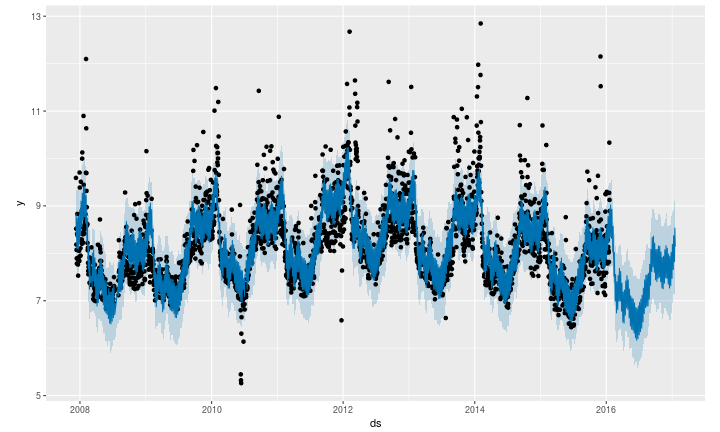

In [14]:
%%R -w 10 -h 6 -u in
plot(m, forecast)

You can use the `prophet_plot_components` function to see the forecast broken down into trend, weekly seasonality, and yearly seasonality.

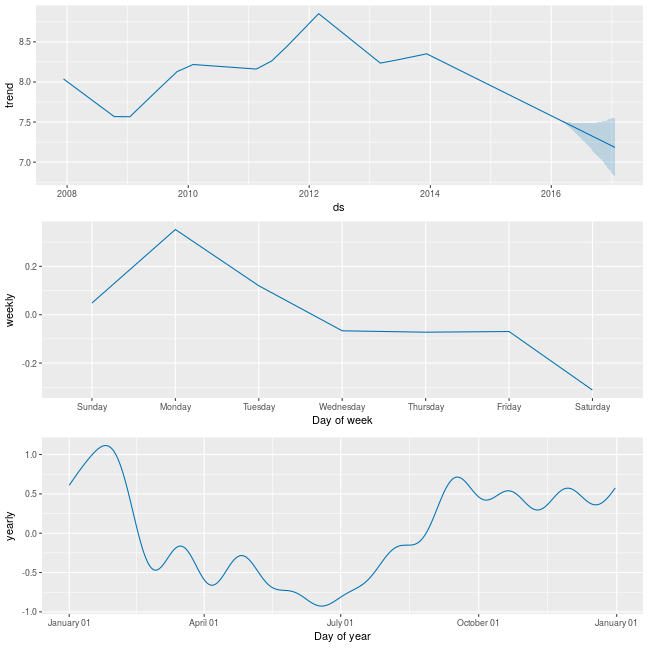

In [15]:
%%R -w 9 -h 9 -u in
prophet_plot_components(m, forecast)

An interactive plot of the forecast using Dygraphs can be made with the command `dyplot.prophet(m, forecast)`.

More details about the options available for each method are available in the docstrings, for example, via `?prophet` or `?fit.prophet`. This documentation is also available in the [reference manual](https://cran.r-project.org/web/packages/prophet/prophet.pdf) on CRAN.